# Pandas

The `numpy` module is excellent for numerical computations, but to handle missing data or arrays with mixed types takes more work. The `pandas` module is currently the most widely used tool for data manipulation, providing high-performance, easy-to-use data structures and advanced data analysis tools.

In particular `pandas` features:

* A fast and efficient "DataFrame" object for data manipulation with integrated indexing;
* Tools for reading and writing data between in-memory data structures and different formats (CSV, Excel, SQL, HDF5);
* Intelligent data alignment and integrated handling of missing data;
* Intelligent label-based slicing, fancy indexing, and subsetting of large data sets;
* Aggregating or transforming data with a powerful "group-by" engine; 
* High performance merging and joining of data sets;
* Hierarchical axis indexing provides an intuitive way of working with high-dimensional data in a lower-dimensional data structure;
* Time series-functionalities;
* Highly optimized for performance, with critical code paths written in Cython or C.


In [14]:
import pandas as pd
import numpy as np

## Series

Series are completely equivalent to 1D array but with axis labels and the possibility to store heterogeneous elements. Of paramount importance are the time-series, used to define time evolutions of a phenomenon. \
Dataframes are constructed with series.


In [15]:
from string import ascii_lowercase as letters

# Creating a series, accessing indexes, values and values by their index 
xs = pd.Series(np.arange(10)*0.5, index=tuple(letters[:10]))
print ("xs:", xs,'\n')
print ("xs indexes:",xs.index,'\n')
# Values of the Series are actually a numpy array
print ("xs values:", xs.values, type(xs.values),'\n')
print (xs['f'], xs.f, xs.h, '\n')
print (xs[['d', 'f', 'h']], '\n')   # as for dictionary
print (type(xs[['d', 'f', 'h']]), '\n')

xs: a    0.0
b    0.5
c    1.0
d    1.5
e    2.0
f    2.5
g    3.0
h    3.5
i    4.0
j    4.5
dtype: float64 

xs indexes: Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'], dtype='object') 

xs values: [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5] <class 'numpy.ndarray'> 

2.5 2.5 3.5 

d    1.5
f    2.5
h    3.5
dtype: float64 

<class 'pandas.core.series.Series'> 



In [16]:
# Extracting elements and operations: same as numpy array
print (xs[:3],'\n')
print (xs[7:], '\n')
print (xs[::3], '\n')
print (xs[xs>3], '\n')
print (np.exp(xs), '\n')
print (np.mean(xs), np.std(xs), '\n')

a    0.0
b    0.5
c    1.0
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a    0.0
d    1.5
g    3.0
j    4.5
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a     1.000000
b     1.648721
c     2.718282
d     4.481689
e     7.389056
f    12.182494
g    20.085537
h    33.115452
i    54.598150
j    90.017131
dtype: float64 

2.25 1.4361406616345072 



In [17]:
# Series can be created from python dictionary too.
# Not that the elements can be whatever!
d = {'b' : 1, 'a' : 'cat', 'c' : [2,3]}
pd.Series(d)

b         1
a       cat
c    [2, 3]
dtype: object

A key difference between Series and ndarray is that operations between Series automatically align the data based on label. Thus, you can write computations without considering whether the Series involved have the same labels.

In [18]:
s = pd.Series(np.random.randn(5), index=tuple(letters[:5]))
print(s)
s = s[1:] + s[:-1]
print(s)

a   -0.500068
b   -1.937418
c    0.491764
d    0.159496
e   -0.285350
dtype: float64
a         NaN
b   -3.874836
c    0.983528
d    0.318991
e         NaN
dtype: float64


### Time series

Time series are very often used to profile the behaviour of a quantity as a function of time. Pandas has a special index for that, `DatetimeIndex`, that can be created e.g. with the function `pd.data_range()`

In [19]:
# to define a date, the datetime module is very useful
import datetime as dt
date = dt.date.today()
print(date)

date = dt.datetime(2023,11,22,10,45,10,15)
print (date)

# otherwise, several notations are interpreted too
date = 'Nov 22 2023'
# or alternatively
date = '22/11/2023 10:45:00'
print (date)

days = pd.date_range(date, periods=7, freq='D')
print (days)

seconds = pd.date_range(date, periods=3600, freq='s')
print (seconds)


2024-01-08
2023-11-22 10:45:10.000015
22/11/2023 10:45:00
DatetimeIndex(['2023-11-22 10:45:00', '2023-11-23 10:45:00',
               '2023-11-24 10:45:00', '2023-11-25 10:45:00',
               '2023-11-26 10:45:00', '2023-11-27 10:45:00',
               '2023-11-28 10:45:00'],
              dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2023-11-22 10:45:00', '2023-11-22 10:45:01',
               '2023-11-22 10:45:02', '2023-11-22 10:45:03',
               '2023-11-22 10:45:04', '2023-11-22 10:45:05',
               '2023-11-22 10:45:06', '2023-11-22 10:45:07',
               '2023-11-22 10:45:08', '2023-11-22 10:45:09',
               ...
               '2023-11-22 11:44:50', '2023-11-22 11:44:51',
               '2023-11-22 11:44:52', '2023-11-22 11:44:53',
               '2023-11-22 11:44:54', '2023-11-22 11:44:55',
               '2023-11-22 11:44:56', '2023-11-22 11:44:57',
               '2023-11-22 11:44:58', '2023-11-22 11:44:59'],
              dtype='datetime64[ns]', leng

To learn more about the frequency strings, please see this [link](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases)


Timestamped data is the most basic type of time series data that associates values with points in time. For pandas objects it means using the points in time.

functions like `pd.to_datetime` can be used, for instance, when reading information as string from a dataset.

Timestamp is the pandas equivalent of python’s Datetime and is interchangeable with it in most cases. 

In [20]:
tstamp = pd.Timestamp(dt.datetime(2020, 11, 9))     # counter that started at 1/1/1970

# internally it counts the nanoseconds from January 1st 19
#tstamp = pd.Timestamp(dt.datetime(1970, 1, 1, 0, 0, 0, 1))
print(tstamp.value)

# when creating a timestamp the format can be explicitly passed
ts = pd.to_datetime('2010/11/12', format='%Y/%m/%d')
print (type(ts))
print (ts.value)
ts = pd.to_datetime('12-11-2010 00:00', format='%d-%m-%Y %H:%M')
print (ts)
print (ts.value)



1604880000000000000
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1289520000000000000
2010-11-12 00:00:00
1289520000000000000


A standard series can be created and (range of) elements can be used as indexes

In [21]:
tseries = pd.Series(np.random.normal(10, 1, len(days)), index=days)
# Extracting elements
print (tseries[0:4], '\n')
print (tseries['2023-11-22':'2023-11-28'], '\n') # Note - includes end time


2023-11-22 10:45:00    10.706048
2023-11-23 10:45:00     9.521014
2023-11-24 10:45:00     8.691514
2023-11-25 10:45:00    11.173222
Freq: D, dtype: float64 

2023-11-22 10:45:00    10.706048
2023-11-23 10:45:00     9.521014
2023-11-24 10:45:00     8.691514
2023-11-25 10:45:00    11.173222
2023-11-26 10:45:00     9.316116
2023-11-27 10:45:00    10.252008
2023-11-28 10:45:00     9.451505
Freq: D, dtype: float64 



`pd.to_datetime` can also be used to create a `DatetimeIndex`:

In [22]:
pd.to_datetime([1, 2, 3, 4], unit='D', origin=pd.Timestamp('1980-02-03'))

DatetimeIndex(['1980-02-04', '1980-02-05', '1980-02-06', '1980-02-07'], dtype='datetime64[ns]', freq=None)

## DataFrame

A pandas DataFrame is like a simple tabular spreadsheet. For future reference (or for people already familiar with R), a pandas DataFrame is very similar to the R DataFrame.

Each column in a DataFrame is a Series object.

The element can be whatever, missing data are dealt with too (as NaN).

Indexes have to be homogeneous.

### DataFrame creation

A DataFrame can be created implicitly, with, e.g., a DatatimeIndex object as index:

In [23]:
entries=10
dates=pd.date_range('11/22/2023 10:45:00',freq='h', periods=entries)
df = pd.DataFrame(np.random.randn(entries,4), index=dates, columns=['A','B','C','D'])
df


,A,B,C,D
2023-11-22 10:45:00,-0.144221,-0.624904,-1.025439,-1.341330
2023-11-22 11:45:00,-1.358592,-1.470099,-0.513004,0.597501
2023-11-22 12:45:00,-0.842815,-0.510336,-1.486611,-1.970298
2023-11-22 13:45:00,0.278990,-1.128202,0.817332,-0.374042
2023-11-22 14:45:00,-0.230240,0.835789,0.507225,0.087591
2023-11-22 15:45:00,-0.403322,-0.669255,1.614883,-1.310434
2023-11-22 16:45:00,1.065932,-0.649199,0.178204,2.711710
2023-11-22 17:45:00,0.148427,-1.410563,0.015480,0.575998
2023-11-22 18:45:00,1.538206,0.364251,0.586669,-0.892575
2023-11-22 19:45:00,0.236900,-1.392373,-0.957409,-2.094559


or by means of a dictionary:


In [24]:
df2 = pd.DataFrame(
    { 'A' : 1.,   # broadcasted along the table
      'B' : pd.Timestamp('20130102'),
      'C' : pd.Series(1,index=range(4),dtype='float32'),
      'D' : np.arange(7,11),
      'E' : pd.Categorical(["test","train","test","train"]),
    }
    )
df2

# check what happens if D and E had different lenghts 

,A,B,C,D,E
0,1.0,2013-01-02,1.0,7,test
1,1.0,2013-01-02,1.0,8,train
2,1.0,2013-01-02,1.0,9,test
3,1.0,2013-01-02,1.0,10,train


### Viewing Data

In [25]:
df.head(2)

,A,B,C,D
2023-11-22 10:45:00,-0.144221,-0.624904,-1.025439,-1.341330
2023-11-22 11:45:00,-1.358592,-1.470099,-0.513004,0.597501


In [26]:
df.tail(4)

,A,B,C,D
2023-11-22 16:45:00,1.065932,-0.649199,0.178204,2.711710
2023-11-22 17:45:00,0.148427,-1.410563,0.015480,0.575998
2023-11-22 18:45:00,1.538206,0.364251,0.586669,-0.892575
2023-11-22 19:45:00,0.236900,-1.392373,-0.957409,-2.094559


In [27]:
df.index

DatetimeIndex(['2023-11-22 10:45:00', '2023-11-22 11:45:00',
               '2023-11-22 12:45:00', '2023-11-22 13:45:00',
               '2023-11-22 14:45:00', '2023-11-22 15:45:00',
               '2023-11-22 16:45:00', '2023-11-22 17:45:00',
               '2023-11-22 18:45:00', '2023-11-22 19:45:00'],
              dtype='datetime64[ns]', freq='H')

In [28]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [29]:
df.values

array([[-0.14422067, -0.62490421, -1.02543866, -1.34132972],
       [-1.35859189, -1.47009869, -0.51300393,  0.59750058],
       [-0.84281457, -0.51033575, -1.48661097, -1.97029811],
       [ 0.27898969, -1.12820199,  0.81733182, -0.37404199],
       [-0.23023955,  0.83578885,  0.50722511,  0.0875906 ],
       [-0.40332178, -0.66925549,  1.61488284, -1.31043432],
       [ 1.06593169, -0.64919853,  0.17820373,  2.71170957],
       [ 0.14842716, -1.4105626 ,  0.01548013,  0.57599757],
       [ 1.53820649,  0.36425107,  0.58666896, -0.89257501],
       [ 0.23689995, -1.392373  , -0.95740911, -2.09455886]])

In [30]:
df.describe()   # statistic of every column

,A,B,C,D
count,10.000000,10.000000,10.000000,10.000000
mean,0.028927,-0.665489,-0.026267,-0.401044
std,0.846069,0.766318,0.962853,1.459213
min,-1.358592,-1.470099,-1.486611,-2.094559
25%,-0.360051,-1.326330,-0.846308,-1.333606
50%,0.002103,-0.659227,0.096842,-0.633308
75%,0.268467,-0.538978,0.566808,0.453896
max,1.538206,0.835789,1.614883,2.711710


In [31]:
df.T

,2023-11-22 10:45:00,2023-11-22 11:45:00,2023-11-22 12:45:00,2023-11-22 13:45:00,2023-11-22 14:45:00,2023-11-22 15:45:00,2023-11-22 16:45:00,2023-11-22 17:45:00,2023-11-22 18:45:00,2023-11-22 19:45:00
A,-0.144221,-1.358592,-0.842815,0.278990,-0.230240,-0.403322,1.065932,0.148427,1.538206,0.236900
B,-0.624904,-1.470099,-0.510336,-1.128202,0.835789,-0.669255,-0.649199,-1.410563,0.364251,-1.392373
C,-1.025439,-0.513004,-1.486611,0.817332,0.507225,1.614883,0.178204,0.015480,0.586669,-0.957409
D,-1.341330,0.597501,-1.970298,-0.374042,0.087591,-1.310434,2.711710,0.575998,-0.892575,-2.094559


In [32]:
df.sort_index(axis=0,ascending=False)

,A,B,C,D
2023-11-22 19:45:00,0.236900,-1.392373,-0.957409,-2.094559
2023-11-22 18:45:00,1.538206,0.364251,0.586669,-0.892575
2023-11-22 17:45:00,0.148427,-1.410563,0.015480,0.575998
2023-11-22 16:45:00,1.065932,-0.649199,0.178204,2.711710
2023-11-22 15:45:00,-0.403322,-0.669255,1.614883,-1.310434
2023-11-22 14:45:00,-0.230240,0.835789,0.507225,0.087591
2023-11-22 13:45:00,0.278990,-1.128202,0.817332,-0.374042
2023-11-22 12:45:00,-0.842815,-0.510336,-1.486611,-1.970298
2023-11-22 11:45:00,-1.358592,-1.470099,-0.513004,0.597501
2023-11-22 10:45:00,-0.144221,-0.624904,-1.025439,-1.341330


In [33]:
df.sort_values(by="C")

,A,B,C,D
2023-11-22 12:45:00,-0.842815,-0.510336,-1.486611,-1.970298
2023-11-22 10:45:00,-0.144221,-0.624904,-1.025439,-1.341330
2023-11-22 19:45:00,0.236900,-1.392373,-0.957409,-2.094559
2023-11-22 11:45:00,-1.358592,-1.470099,-0.513004,0.597501
2023-11-22 17:45:00,0.148427,-1.410563,0.015480,0.575998
2023-11-22 16:45:00,1.065932,-0.649199,0.178204,2.711710
2023-11-22 14:45:00,-0.230240,0.835789,0.507225,0.087591
2023-11-22 18:45:00,1.538206,0.364251,0.586669,-0.892575
2023-11-22 13:45:00,0.278990,-1.128202,0.817332,-0.374042
2023-11-22 15:45:00,-0.403322,-0.669255,1.614883,-1.310434


## Selection

### Getting slices

The following show how to get part of the DataFrame (i.e. not just the elements)

In [34]:
## standard and safe
print (df['A'],'\n')

## equivalent but dangerous (imagine blank spaces in the name of the column..)
print (df.A)    # A translated into a method

2023-11-22 10:45:00   -0.144221
2023-11-22 11:45:00   -1.358592
2023-11-22 12:45:00   -0.842815
2023-11-22 13:45:00    0.278990
2023-11-22 14:45:00   -0.230240
2023-11-22 15:45:00   -0.403322
2023-11-22 16:45:00    1.065932
2023-11-22 17:45:00    0.148427
2023-11-22 18:45:00    1.538206
2023-11-22 19:45:00    0.236900
Freq: H, Name: A, dtype: float64 

2023-11-22 10:45:00   -0.144221
2023-11-22 11:45:00   -1.358592
2023-11-22 12:45:00   -0.842815
2023-11-22 13:45:00    0.278990
2023-11-22 14:45:00   -0.230240
2023-11-22 15:45:00   -0.403322
2023-11-22 16:45:00    1.065932
2023-11-22 17:45:00    0.148427
2023-11-22 18:45:00    1.538206
2023-11-22 19:45:00    0.236900
Freq: H, Name: A, dtype: float64


In [35]:
# selecting rows by counting
print (df[0:3])

# or by index
print (df["2023-11-22 10:45:00":"2023-11-22 12:45:00"])

                            A         B         C         D
2023-11-22 10:45:00 -0.144221 -0.624904 -1.025439 -1.341330
2023-11-22 11:45:00 -1.358592 -1.470099 -0.513004  0.597501
2023-11-22 12:45:00 -0.842815 -0.510336 -1.486611 -1.970298
                            A         B         C         D
2023-11-22 10:45:00 -0.144221 -0.624904 -1.025439 -1.341330
2023-11-22 11:45:00 -1.358592 -1.470099 -0.513004  0.597501
2023-11-22 12:45:00 -0.842815 -0.510336 -1.486611 -1.970298


### Selection by label

In [36]:
# getting a cross section (part of the DataFrame) using a label
df.loc[dates[0]]

A   -0.144221
B   -0.624904
C   -1.025439
D   -1.341330
Name: 2023-11-22 10:45:00, dtype: float64

In [37]:
# selecting on a multi-axis by label:
df.loc[:,['A','B']]
#a=df.loc[:,['A','B']]

,A,B
2023-11-22 10:45:00,-0.144221,-0.624904
2023-11-22 11:45:00,-1.358592,-1.470099
2023-11-22 12:45:00,-0.842815,-0.510336
2023-11-22 13:45:00,0.278990,-1.128202
2023-11-22 14:45:00,-0.230240,0.835789
2023-11-22 15:45:00,-0.403322,-0.669255
2023-11-22 16:45:00,1.065932,-0.649199
2023-11-22 17:45:00,0.148427,-1.410563
2023-11-22 18:45:00,1.538206,0.364251
2023-11-22 19:45:00,0.236900,-1.392373


In [38]:
# showing label slicing, both endpoints are included:
df.loc['2023-11-22 14:45:00':'2023-11-22 16:45:00',['A','B']]

,A,B
2023-11-22 14:45:00,-0.230240,0.835789
2023-11-22 15:45:00,-0.403322,-0.669255
2023-11-22 16:45:00,1.065932,-0.649199


In [39]:
# getting an individual element
print (df.loc[dates[1],'A'])

# equivalently
print (df.at[dates[1],'A'])

-1.358591892988131
-1.358591892988131


### Selecting by position

In [40]:
# select via the position of the passed integers:
print (df.iloc[3],'\n')

# notation similar to numpy/python
print (df.iloc[3:5,0:2])

A    0.278990
B   -1.128202
C    0.817332
D   -0.374042
Name: 2023-11-22 13:45:00, dtype: float64 

                           A         B
2023-11-22 13:45:00  0.27899 -1.128202
2023-11-22 14:45:00 -0.23024  0.835789


In [41]:
# selecting raws 1,2 and 4 for columns 0 and 2
df.iloc[[1,2,4],[0,2]]

,A,C
2023-11-22 11:45:00,-1.358592,-0.513004
2023-11-22 12:45:00,-0.842815,-1.486611
2023-11-22 14:45:00,-0.230240,0.507225


In [42]:
# slicing rows explicitly
print (df.iloc[1:3,:],'\n')

# slicing columns explicitly
print (df.iloc[:,1:3])


                            A         B         C         D
2023-11-22 11:45:00 -1.358592 -1.470099 -0.513004  0.597501
2023-11-22 12:45:00 -0.842815 -0.510336 -1.486611 -1.970298 

                            B         C
2023-11-22 10:45:00 -0.624904 -1.025439
2023-11-22 11:45:00 -1.470099 -0.513004
2023-11-22 12:45:00 -0.510336 -1.486611
2023-11-22 13:45:00 -1.128202  0.817332
2023-11-22 14:45:00  0.835789  0.507225
2023-11-22 15:45:00 -0.669255  1.614883
2023-11-22 16:45:00 -0.649199  0.178204
2023-11-22 17:45:00 -1.410563  0.015480
2023-11-22 18:45:00  0.364251  0.586669
2023-11-22 19:45:00 -1.392373 -0.957409


In [43]:
# selecting an individual element by position
df.iloc[1,1]
#df.iat[1,1]


-1.4700986924489599

### Boolean index

Very powerful way of filtering out data with certain features. Notation is very similar to numpy arrays.

In [44]:
# Filter by a boolean condition on the values of a single column
df[df['B'] > 0]

,A,B,C,D
2023-11-22 14:45:00,-0.230240,0.835789,0.507225,0.087591
2023-11-22 18:45:00,1.538206,0.364251,0.586669,-0.892575


In [45]:
# Selecting on the basis of boolean conditions applied to the whole DataFrame
df[df>0]

# a DataFrame with the same shape is returned, with NaN's where condition is not met (because we put the condition on the whole dataframe)

,A,B,C,D
2023-11-22 10:45:00,NaN,NaN,NaN,NaN
2023-11-22 11:45:00,NaN,NaN,NaN,0.597501
2023-11-22 12:45:00,NaN,NaN,NaN,NaN
2023-11-22 13:45:00,0.278990,NaN,0.817332,NaN
2023-11-22 14:45:00,NaN,0.835789,0.507225,0.087591
2023-11-22 15:45:00,NaN,NaN,1.614883,NaN
2023-11-22 16:45:00,1.065932,NaN,0.178204,2.711710
2023-11-22 17:45:00,0.148427,NaN,0.015480,0.575998
2023-11-22 18:45:00,1.538206,0.364251,0.586669,NaN
2023-11-22 19:45:00,0.236900,NaN,NaN,NaN


### Setting

Combination of selection and setting of values

In [46]:
# setting values by label (same as by position)
df.at[dates[0],'A'] = 0

# setting and assigning a numpy array
df.loc[:,'D'] = np.array([5] * len(df))

# defining a brend new column
df['E'] = np.arange(len(df))*0.5

# defining a brend new column by means of a pd.Series: indexes must be the same!
df['E prime'] = pd.Series(np.arange(len(df))*2, index=df.index)


In [47]:
df

,A,B,C,D,E,E prime
2023-11-22 10:45:00,0.000000,-0.624904,-1.025439,5,0.0,0
2023-11-22 11:45:00,-1.358592,-1.470099,-0.513004,5,0.5,2
2023-11-22 12:45:00,-0.842815,-0.510336,-1.486611,5,1.0,4
2023-11-22 13:45:00,0.278990,-1.128202,0.817332,5,1.5,6
2023-11-22 14:45:00,-0.230240,0.835789,0.507225,5,2.0,8
2023-11-22 15:45:00,-0.403322,-0.669255,1.614883,5,2.5,10
2023-11-22 16:45:00,1.065932,-0.649199,0.178204,5,3.0,12
2023-11-22 17:45:00,0.148427,-1.410563,0.015480,5,3.5,14
2023-11-22 18:45:00,1.538206,0.364251,0.586669,5,4.0,16
2023-11-22 19:45:00,0.236900,-1.392373,-0.957409,5,4.5,18


In [48]:
def dcos(theta):
    theta = theta*(np.pi/180)
    return np.cos(theta)
 
df['cosine'] = pd.Series(df["E"].apply(dcos), index=df.index)
df

,A,B,C,D,E,E prime,cosine
2023-11-22 10:45:00,0.000000,-0.624904,-1.025439,5,0.0,0,1.000000
2023-11-22 11:45:00,-1.358592,-1.470099,-0.513004,5,0.5,2,0.999962
2023-11-22 12:45:00,-0.842815,-0.510336,-1.486611,5,1.0,4,0.999848
2023-11-22 13:45:00,0.278990,-1.128202,0.817332,5,1.5,6,0.999657
2023-11-22 14:45:00,-0.230240,0.835789,0.507225,5,2.0,8,0.999391
2023-11-22 15:45:00,-0.403322,-0.669255,1.614883,5,2.5,10,0.999048
2023-11-22 16:45:00,1.065932,-0.649199,0.178204,5,3.0,12,0.998630
2023-11-22 17:45:00,0.148427,-1.410563,0.015480,5,3.5,14,0.998135
2023-11-22 18:45:00,1.538206,0.364251,0.586669,5,4.0,16,0.997564
2023-11-22 19:45:00,0.236900,-1.392373,-0.957409,5,4.5,18,0.996917


In [49]:
# another example of global setting
df2=df.copy()   # can edit only one of the two

df2[df2>0] = -df2
df2

,A,B,C,D,E,E prime,cosine
2023-11-22 10:45:00,0.000000,-0.624904,-1.025439,-5,0.0,0,-1.000000
2023-11-22 11:45:00,-1.358592,-1.470099,-0.513004,-5,-0.5,-2,-0.999962
2023-11-22 12:45:00,-0.842815,-0.510336,-1.486611,-5,-1.0,-4,-0.999848
2023-11-22 13:45:00,-0.278990,-1.128202,-0.817332,-5,-1.5,-6,-0.999657
2023-11-22 14:45:00,-0.230240,-0.835789,-0.507225,-5,-2.0,-8,-0.999391
2023-11-22 15:45:00,-0.403322,-0.669255,-1.614883,-5,-2.5,-10,-0.999048
2023-11-22 16:45:00,-1.065932,-0.649199,-0.178204,-5,-3.0,-12,-0.998630
2023-11-22 17:45:00,-0.148427,-1.410563,-0.015480,-5,-3.5,-14,-0.998135
2023-11-22 18:45:00,-1.538206,-0.364251,-0.586669,-5,-4.0,-16,-0.997564
2023-11-22 19:45:00,-0.236900,-1.392373,-0.957409,-5,-4.5,-18,-0.996917


In [50]:
df

,A,B,C,D,E,E prime,cosine
2023-11-22 10:45:00,0.000000,-0.624904,-1.025439,5,0.0,0,1.000000
2023-11-22 11:45:00,-1.358592,-1.470099,-0.513004,5,0.5,2,0.999962
2023-11-22 12:45:00,-0.842815,-0.510336,-1.486611,5,1.0,4,0.999848
2023-11-22 13:45:00,0.278990,-1.128202,0.817332,5,1.5,6,0.999657
2023-11-22 14:45:00,-0.230240,0.835789,0.507225,5,2.0,8,0.999391
2023-11-22 15:45:00,-0.403322,-0.669255,1.614883,5,2.5,10,0.999048
2023-11-22 16:45:00,1.065932,-0.649199,0.178204,5,3.0,12,0.998630
2023-11-22 17:45:00,0.148427,-1.410563,0.015480,5,3.5,14,0.998135
2023-11-22 18:45:00,1.538206,0.364251,0.586669,5,4.0,16,0.997564
2023-11-22 19:45:00,0.236900,-1.392373,-0.957409,5,4.5,18,0.996917


### Dropping

N.B.: dropping doesn't act permanently on the DataFrame, i.e. to get that do :
```python
df = df.drop(....)
```

In [51]:
# Dropping by column
df.drop(['E prime'], axis=1)

#which is equivalent to
new_df=df.drop(columns=['E prime'])
new_df

,A,B,C,D,E,cosine
2023-11-22 10:45:00,0.000000,-0.624904,-1.025439,5,0.0,1.000000
2023-11-22 11:45:00,-1.358592,-1.470099,-0.513004,5,0.5,0.999962
2023-11-22 12:45:00,-0.842815,-0.510336,-1.486611,5,1.0,0.999848
2023-11-22 13:45:00,0.278990,-1.128202,0.817332,5,1.5,0.999657
2023-11-22 14:45:00,-0.230240,0.835789,0.507225,5,2.0,0.999391
2023-11-22 15:45:00,-0.403322,-0.669255,1.614883,5,2.5,0.999048
2023-11-22 16:45:00,1.065932,-0.649199,0.178204,5,3.0,0.998630
2023-11-22 17:45:00,0.148427,-1.410563,0.015480,5,3.5,0.998135
2023-11-22 18:45:00,1.538206,0.364251,0.586669,5,4.0,0.997564
2023-11-22 19:45:00,0.236900,-1.392373,-0.957409,5,4.5,0.996917


In [52]:
# Dropping by raws
# safe and always working
df.drop(df.index[[1,2,3,4]])

,A,B,C,D,E,E prime,cosine
2023-11-22 10:45:00,0.000000,-0.624904,-1.025439,5,0.0,0,1.000000
2023-11-22 15:45:00,-0.403322,-0.669255,1.614883,5,2.5,10,0.999048
2023-11-22 16:45:00,1.065932,-0.649199,0.178204,5,3.0,12,0.998630
2023-11-22 17:45:00,0.148427,-1.410563,0.015480,5,3.5,14,0.998135
2023-11-22 18:45:00,1.538206,0.364251,0.586669,5,4.0,16,0.997564
2023-11-22 19:45:00,0.236900,-1.392373,-0.957409,5,4.5,18,0.996917


In [53]:
df

,A,B,C,D,E,E prime,cosine
2023-11-22 10:45:00,0.000000,-0.624904,-1.025439,5,0.0,0,1.000000
2023-11-22 11:45:00,-1.358592,-1.470099,-0.513004,5,0.5,2,0.999962
2023-11-22 12:45:00,-0.842815,-0.510336,-1.486611,5,1.0,4,0.999848
2023-11-22 13:45:00,0.278990,-1.128202,0.817332,5,1.5,6,0.999657
2023-11-22 14:45:00,-0.230240,0.835789,0.507225,5,2.0,8,0.999391
2023-11-22 15:45:00,-0.403322,-0.669255,1.614883,5,2.5,10,0.999048
2023-11-22 16:45:00,1.065932,-0.649199,0.178204,5,3.0,12,0.998630
2023-11-22 17:45:00,0.148427,-1.410563,0.015480,5,3.5,14,0.998135
2023-11-22 18:45:00,1.538206,0.364251,0.586669,5,4.0,16,0.997564
2023-11-22 19:45:00,0.236900,-1.392373,-0.957409,5,4.5,18,0.996917


In [54]:
# something like df.drop('index_name') 
# would work but the type of index must be specificed, 
# in particular with DatetimeIndex
df.drop(pd.to_datetime("2023-11-22 18:45:00"))

,A,B,C,D,E,E prime,cosine
2023-11-22 10:45:00,0.000000,-0.624904,-1.025439,5,0.0,0,1.000000
2023-11-22 11:45:00,-1.358592,-1.470099,-0.513004,5,0.5,2,0.999962
2023-11-22 12:45:00,-0.842815,-0.510336,-1.486611,5,1.0,4,0.999848
2023-11-22 13:45:00,0.278990,-1.128202,0.817332,5,1.5,6,0.999657
2023-11-22 14:45:00,-0.230240,0.835789,0.507225,5,2.0,8,0.999391
2023-11-22 15:45:00,-0.403322,-0.669255,1.614883,5,2.5,10,0.999048
2023-11-22 16:45:00,1.065932,-0.649199,0.178204,5,3.0,12,0.998630
2023-11-22 17:45:00,0.148427,-1.410563,0.015480,5,3.5,14,0.998135
2023-11-22 19:45:00,0.236900,-1.392373,-0.957409,5,4.5,18,0.996917


## Missing data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations.

In [55]:
df_wNan = df[df>0]
df_wNan

,A,B,C,D,E,E prime,cosine
2023-11-22 10:45:00,NaN,NaN,NaN,5,NaN,NaN,1.000000
2023-11-22 11:45:00,NaN,NaN,NaN,5,0.5,2.0,0.999962
2023-11-22 12:45:00,NaN,NaN,NaN,5,1.0,4.0,0.999848
2023-11-22 13:45:00,0.278990,NaN,0.817332,5,1.5,6.0,0.999657
2023-11-22 14:45:00,NaN,0.835789,0.507225,5,2.0,8.0,0.999391
2023-11-22 15:45:00,NaN,NaN,1.614883,5,2.5,10.0,0.999048
2023-11-22 16:45:00,1.065932,NaN,0.178204,5,3.0,12.0,0.998630
2023-11-22 17:45:00,0.148427,NaN,0.015480,5,3.5,14.0,0.998135
2023-11-22 18:45:00,1.538206,0.364251,0.586669,5,4.0,16.0,0.997564
2023-11-22 19:45:00,0.236900,NaN,NaN,5,4.5,18.0,0.996917


In [56]:
# dropping raws with at least a Nan
df_wNan.dropna(how='any')

,A,B,C,D,E,E prime,cosine
2023-11-22 18:45:00,1.538206,0.364251,0.586669,5,4.0,16.0,0.997564


In [57]:
# getting a mask
df_wNan.isna()
#df_wNan.notna()

,A,B,C,D,E,E prime,cosine
2023-11-22 10:45:00,True,True,True,False,True,True,False
2023-11-22 11:45:00,True,True,True,False,False,False,False
2023-11-22 12:45:00,True,True,True,False,False,False,False
2023-11-22 13:45:00,False,True,False,False,False,False,False
2023-11-22 14:45:00,True,False,False,False,False,False,False
2023-11-22 15:45:00,True,True,False,False,False,False,False
2023-11-22 16:45:00,False,True,False,False,False,False,False
2023-11-22 17:45:00,False,True,False,False,False,False,False
2023-11-22 18:45:00,False,False,False,False,False,False,False
2023-11-22 19:45:00,False,True,True,False,False,False,False


In [58]:
# filling missing data
df_wNan.fillna(value=0)

,A,B,C,D,E,E prime,cosine
2023-11-22 10:45:00,0.000000,0.000000,0.000000,5,0.0,0.0,1.000000
2023-11-22 11:45:00,0.000000,0.000000,0.000000,5,0.5,2.0,0.999962
2023-11-22 12:45:00,0.000000,0.000000,0.000000,5,1.0,4.0,0.999848
2023-11-22 13:45:00,0.278990,0.000000,0.817332,5,1.5,6.0,0.999657
2023-11-22 14:45:00,0.000000,0.835789,0.507225,5,2.0,8.0,0.999391
2023-11-22 15:45:00,0.000000,0.000000,1.614883,5,2.5,10.0,0.999048
2023-11-22 16:45:00,1.065932,0.000000,0.178204,5,3.0,12.0,0.998630
2023-11-22 17:45:00,0.148427,0.000000,0.015480,5,3.5,14.0,0.998135
2023-11-22 18:45:00,1.538206,0.364251,0.586669,5,4.0,16.0,0.997564
2023-11-22 19:45:00,0.236900,0.000000,0.000000,5,4.5,18.0,0.996917


Fill gaps forward or backward by propagating non-NA values forward or backward:

In [59]:
df_wNan.fillna(method='pad')

,A,B,C,D,E,E prime,cosine
2023-11-22 10:45:00,NaN,NaN,NaN,5,NaN,NaN,1.000000
2023-11-22 11:45:00,NaN,NaN,NaN,5,0.5,2.0,0.999962
2023-11-22 12:45:00,NaN,NaN,NaN,5,1.0,4.0,0.999848
2023-11-22 13:45:00,0.278990,NaN,0.817332,5,1.5,6.0,0.999657
2023-11-22 14:45:00,0.278990,0.835789,0.507225,5,2.0,8.0,0.999391
2023-11-22 15:45:00,0.278990,0.835789,1.614883,5,2.5,10.0,0.999048
2023-11-22 16:45:00,1.065932,0.835789,0.178204,5,3.0,12.0,0.998630
2023-11-22 17:45:00,0.148427,0.835789,0.015480,5,3.5,14.0,0.998135
2023-11-22 18:45:00,1.538206,0.364251,0.586669,5,4.0,16.0,0.997564
2023-11-22 19:45:00,0.236900,0.364251,0.586669,5,4.5,18.0,0.996917


## Operations

Here comes the most relevant advantage of DataFrame. Operations on columns are extremly fast, almost as fast as the actual operation between elements in a raw

In [60]:
# Some statistics (mean() just as an example)
# raws
print (df.mean(axis=0),'\n')
# columns
print (df.mean(axis=1),'\n')

A          0.043349
B         -0.665489
C         -0.026267
D          5.000000
E          2.250000
E prime    9.000000
cosine     0.998915
dtype: float64 

2023-11-22 10:45:00    0.621380
2023-11-22 11:45:00    0.736895
2023-11-22 12:45:00    1.165727
2023-11-22 13:45:00    1.923968
2023-11-22 14:45:00    2.444595
2023-11-22 15:45:00    2.720193
2023-11-22 16:45:00    3.084795
2023-11-22 17:45:00    3.178783
2023-11-22 18:45:00    4.069527
2023-11-22 19:45:00    3.769148
Freq: H, dtype: float64 



In [61]:
# global operations on columns  # only get the result, the df remains unchanged
df.apply(np.cumsum)

,A,B,C,D,E,E prime,cosine
2023-11-22 10:45:00,0.000000,-0.624904,-1.025439,5,0.0,0,1.000000
2023-11-22 11:45:00,-1.358592,-2.095003,-1.538443,10,0.5,2,1.999962
2023-11-22 12:45:00,-2.201406,-2.605339,-3.025054,15,1.5,6,2.999810
2023-11-22 13:45:00,-1.922417,-3.733541,-2.207722,20,3.0,12,3.999467
2023-11-22 14:45:00,-2.152656,-2.897752,-1.700497,25,5.0,20,4.998858
2023-11-22 15:45:00,-2.555978,-3.567007,-0.085614,30,7.5,30,5.997906
2023-11-22 16:45:00,-1.490046,-4.216206,0.092590,35,10.5,42,6.996536
2023-11-22 17:45:00,-1.341619,-5.626768,0.108070,40,14.0,56,7.994670
2023-11-22 18:45:00,0.196587,-5.262517,0.694739,45,18.0,72,8.992234
2023-11-22 19:45:00,0.433487,-6.654890,-0.262670,50,22.5,90,9.989152


In [62]:
df

,A,B,C,D,E,E prime,cosine
2023-11-22 10:45:00,0.000000,-0.624904,-1.025439,5,0.0,0,1.000000
2023-11-22 11:45:00,-1.358592,-1.470099,-0.513004,5,0.5,2,0.999962
2023-11-22 12:45:00,-0.842815,-0.510336,-1.486611,5,1.0,4,0.999848
2023-11-22 13:45:00,0.278990,-1.128202,0.817332,5,1.5,6,0.999657
2023-11-22 14:45:00,-0.230240,0.835789,0.507225,5,2.0,8,0.999391
2023-11-22 15:45:00,-0.403322,-0.669255,1.614883,5,2.5,10,0.999048
2023-11-22 16:45:00,1.065932,-0.649199,0.178204,5,3.0,12,0.998630
2023-11-22 17:45:00,0.148427,-1.410563,0.015480,5,3.5,14,0.998135
2023-11-22 18:45:00,1.538206,0.364251,0.586669,5,4.0,16,0.997564
2023-11-22 19:45:00,0.236900,-1.392373,-0.957409,5,4.5,18,0.996917


In [63]:
df.apply(lambda x: x.max() - x.min())

A           2.896798
B           2.305888
C           3.101494
D           0.000000
E           4.500000
E prime    18.000000
cosine      0.003083
dtype: float64

In [64]:
# syntax is as usual similar to that of numpy arrays
df['A']+df['B']

2023-11-22 10:45:00   -0.624904
2023-11-22 11:45:00   -2.828691
2023-11-22 12:45:00   -1.353150
2023-11-22 13:45:00   -0.849212
2023-11-22 14:45:00    0.605549
2023-11-22 15:45:00   -1.072577
2023-11-22 16:45:00    0.416733
2023-11-22 17:45:00   -1.262135
2023-11-22 18:45:00    1.902458
2023-11-22 19:45:00   -1.155473
Freq: H, dtype: float64

Let's play it hard and load (in memory) a (relatively) large dataset

In [65]:
# WARNING! link in past notebook was wrong!, (if needed) get the right file from:
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

file_name="~/data/data_000637.txt"
data=pd.read_csv(file_name)
data.tail(10)

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
1310710,1,1,36,3869211171,427,13
1310711,1,1,39,3869211171,430,0
1310712,1,1,35,3869211171,429,4
1310713,1,0,64,3869211171,758,18
1310714,1,0,60,3869211171,762,2
1310715,1,0,62,3869211171,762,14
1310716,1,1,4,3869211171,763,11
1310717,1,0,64,3869211171,764,0
1310718,1,0,139,3869211171,769,0
1310719,1,0,61,3869211171,762,18


Let's now do some operations among (elements of) columns

In [66]:
# the one-liner killing it all
data['timens']=data['TDC_MEAS']*25/30+data['BX_COUNTER']*25

In [67]:
data['timens']

0          59371.666667
1          59372.500000
2          63848.333333
3          63965.833333
4          69020.833333
               ...     
1310715    19061.666667
1310716    19084.166667
1310717    19100.000000
1310718    19225.000000
1310719    19065.000000
Name: timens, Length: 1310720, dtype: float64

In [68]:
# the old slooow way
def conversion(data):
    result=[]
    for i in range(len(data)): 
        result.append(data.loc[data.index[i],'TDC_MEAS']*25/30.+data.loc[data.index[i],'BX_COUNTER']*25)
    return result

data['timens']=conversion(data)

## Merge

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

### Concat

concatenation (adding rows) is straightforward


In [69]:
rdf = pd.DataFrame(np.random.randn(10, 4))
rdf

,0,1,2,3
0,-1.566765,-0.615057,1.425568,1.587888
1,0.930879,0.389642,0.643947,-0.036442
2,-0.560351,1.019208,-1.144567,-0.981650
3,-0.445129,0.820864,-1.199353,-0.960924
4,-0.192103,-0.535768,0.105573,0.826415
5,-0.933550,-0.100982,0.029250,0.870904
6,0.333818,0.273111,-1.006887,0.958370
7,0.017212,0.308342,0.672720,-0.823291
8,-0.702453,-0.053722,-1.658800,-0.634792
9,-0.590696,0.006395,-0.976539,1.169552


In [70]:
# divide it into pieaces raw-wise
pieces = [rdf[:3], rdf[3:7], rdf[7:]]
pieces

[          0         1         2         3
 0 -1.566765 -0.615057  1.425568  1.587888
 1  0.930879  0.389642  0.643947 -0.036442
 2 -0.560351  1.019208 -1.144567 -0.981650,
           0         1         2         3
 3 -0.445129  0.820864 -1.199353 -0.960924
 4 -0.192103 -0.535768  0.105573  0.826415
 5 -0.933550 -0.100982  0.029250  0.870904
 6  0.333818  0.273111 -1.006887  0.958370,
           0         1         2         3
 7  0.017212  0.308342  0.672720 -0.823291
 8 -0.702453 -0.053722 -1.658800 -0.634792
 9 -0.590696  0.006395 -0.976539  1.169552]

In [71]:
# put it back together
#pd.concat(pieces)

# indexes can be ignored
pd.concat(pieces, ignore_index=True)

# in case of dimension mismatch, Nan are added where needed

,0,1,2,3
0,-1.566765,-0.615057,1.425568,1.587888
1,0.930879,0.389642,0.643947,-0.036442
2,-0.560351,1.019208,-1.144567,-0.981650
3,-0.445129,0.820864,-1.199353,-0.960924
4,-0.192103,-0.535768,0.105573,0.826415
5,-0.933550,-0.100982,0.029250,0.870904
6,0.333818,0.273111,-1.006887,0.958370
7,0.017212,0.308342,0.672720,-0.823291
8,-0.702453,-0.053722,-1.658800,-0.634792
9,-0.590696,0.006395,-0.976539,1.169552


In [72]:
# appending a single row (as a Series)
s = rdf.iloc[3]
rdf = pd.concat([rdf,s.to_frame().T], ignore_index=True)
rdf

,0,1,2,3
0,-1.566765,-0.615057,1.425568,1.587888
1,0.930879,0.389642,0.643947,-0.036442
2,-0.560351,1.019208,-1.144567,-0.981650
3,-0.445129,0.820864,-1.199353,-0.960924
4,-0.192103,-0.535768,0.105573,0.826415
5,-0.933550,-0.100982,0.029250,0.870904
6,0.333818,0.273111,-1.006887,0.958370
7,0.017212,0.308342,0.672720,-0.823291
8,-0.702453,-0.053722,-1.658800,-0.634792
9,-0.590696,0.006395,-0.976539,1.169552


### Merge/Join

SQL like operations on table can be performed on DataFrames. This is all rather sophisticated, refer to the [doc](https://pandas.pydata.org/pandas-docs/stable/merging.html#merging) for more info/examples.\
Useful when e have multiindices

In [73]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
print(left)
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
print(right)
pd.merge(left,right,on="key")

   key  lval
0  foo     1
1  bar     2
   key  rval
0  foo     4
1  bar     5


,key,lval,rval
0,foo,1,4
1,bar,2,5


## Grouping

By “group by” we are referring to a process involving one or more of the following steps:

* Splitting the data into groups based on some criteria
* Applying a function to each group independently
* Combining the results into a data structure


Grouping is one of the most powerful and at the same time most sofisticated action you can perform with DataFrames. Mastering it is key for an effective usage of Pandas and vectorized data analysis. Reading the [documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html) or going through a [tutorial](https://realpython.com/pandas-groupby/) is warmly recommended. 

In [74]:
gdf = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B' : ['one', 'one', 'two', 'three',
                           'two', 'two', 'one', 'three'],
                    'C' : np.random.randn(8),
                    'D' : np.random.randn(8)})
gdf

,A,B,C,D
0,foo,one,1.088069,-1.231449
1,bar,one,-1.511232,0.293688
2,foo,two,-1.172811,-0.537215
3,bar,three,-1.732762,0.647301
4,foo,two,0.856980,-0.317043
5,bar,two,0.244556,0.384137
6,foo,one,1.352358,-0.034511
7,foo,three,1.367396,2.385523


In [75]:
# Grouping and then applying the sum() 
# function to the resulting groups (effective only where number are there).
gdf.groupby('A').sum()

,C,D
A,,
bar,-2.999438,1.325127
foo,3.491993,0.265305


## Multi-indexing


Hierarchical / Multi-level indexing allows sophisticated data analysis on higher dimensional data. In essence, it enables you to store and manipulate data with an arbitrary number of dimensions in lower dimensional data structures like Series (1d) and DataFrame (2d).

In [76]:
tuples = list(zip(['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
          ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']))
multi_index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
print (multi_index,'\n')

s = pd.Series(np.random.randn(8), index=multi_index)
print (s)


MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second']) 

first  second
bar    one      -0.734283
       two      -0.163772
baz    one       0.461531
       two      -1.112192
foo    one       0.732176
       two      -0.942274
qux    one      -0.064859
       two      -0.520952
dtype: float64


In [77]:
# it enables further features of the groupby method,
# e.g. when group-by by multiple columns
gdf.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -1.511232  0.293688
    three -1.732762  0.647301
    two    0.244556  0.384137
foo one    2.440427 -1.265960
    three  1.367396  2.385523
    two   -0.315831 -0.854257

In [78]:
# stack() method “compresses” a level in the DataFrame’s columns
gdf.groupby(['A','B']).sum().stack()

A    B       
bar  one    C   -1.511232
            D    0.293688
     three  C   -1.732762
            D    0.647301
     two    C    0.244556
            D    0.384137
foo  one    C    2.440427
            D   -1.265960
     three  C    1.367396
            D    2.385523
     two    C   -0.315831
            D   -0.854257
dtype: float64

## Plotting

Just a preview, more on the next lab class!

<AxesSubplot:>

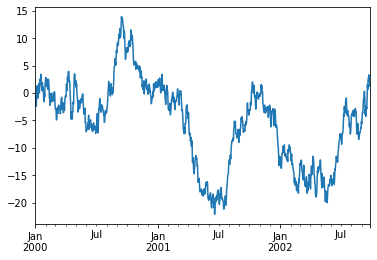

In [79]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts.cumsum().plot()

<Figure size 432x288 with 0 Axes>

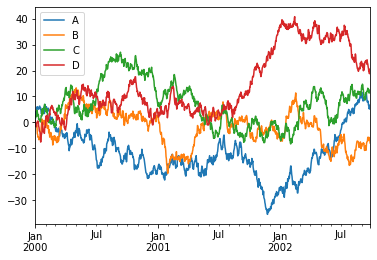

In [80]:
import matplotlib.pyplot as plt

pdf=pd.DataFrame(np.random.randn(1000, 4), index=ts.index,columns=['A', 'B', 'C', 'D'])
pdf = pdf.cumsum()
plt.figure(); pdf.plot(); plt.legend(loc='best')